###                         **PSL Prediction**

## Mounting Google Drive

In [206]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


 **Importing libraries**

In [207]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Datasets**

In [249]:
# Read the files and name them accordingly
%load_ext google.colab.data_table

pslmatches = pd.read_csv('matches.csv')                     #match by match dataset
pslball = pd.read_csv('ball.csv')                 #ball by ball dataset

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# **Basic data analysis**

**Head of datatsets**

In [209]:
#Ensure file reading 
pslmatches.head(5)

,Id,season,date,team1,team2,toss_winner,toss_decision,winner,win_by_wickets,win_by_runs,man_of_match,venue,umpire1,umpire2,result
0,1,2016,2/4/2016,Islamabad United,Quetta Gladiators,Quetta Gladiators,field,Quetta Gladiators,8,0,Mohammad Nawaz,Dubai International Cricket Stadium,JS Wilson,Shozab Raza,normal
1,2,2016,2/5/2016,Peshawar Zalmi,Islamabad United,Peshawar Zalmi,bat,Peshawar Zalmi,0,24,Mohammad Asghar,Dubai International Cricket Stadium,Rashid Riaz,Shozab Raza,normal
2,3,2016,2/5/2016,Lahore Qalandars,Karachi Kings,Karachi Kings,field,Karachi Kings,7,0,Shakib Al Hasan,Dubai International Cricket Stadium,Rashid Riaz,Shozab Raza,normal
3,4,2016,2/6/2016,Lahore Qalandars,Peshawar Zalmi,Peshawar Zalmi,field,Peshawar Zalmi,9,0,Tamim Iqbal,Dubai International Cricket Stadium,Rashid Riaz,JS Wilson,normal
4,5,2016,2/7/2016,Karachi Kings,Quetta Gladiators,Quetta Gladiators,field,Quetta Gladiators,8,0,Ahmed Shehzad,Dubai International Cricket Stadium,Rashid Riaz,Shozab Raza,normal


In [250]:
#Ensure file reading 
pslball.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,total_run
0,24,2016,2/9/2017,Dubai International Cricket Stadium,1,0.1,Peshawar Zalmi,Islamabad United,Mohammad Hafeez,DJ Malan,Mohammad Irfan,0,0,NaN,NaN,NaN,NaN,NaN,caught,Mohammad Hafeez,0
1,24,2016,2/9/2017,Dubai International Cricket Stadium,1,0.2,Peshawar Zalmi,Islamabad United,Kamran Akmal,DJ Malan,Mohammad Irfan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,24,2016,2/9/2017,Dubai International Cricket Stadium,1,0.3,Peshawar Zalmi,Islamabad United,DJ Malan,Kamran Akmal,Mohammad Irfan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,24,2016,2/9/2017,Dubai International Cricket Stadium,1,0.4,Peshawar Zalmi,Islamabad United,DJ Malan,Kamran Akmal,Mohammad Irfan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,24,2016,2/9/2017,Dubai International Cricket Stadium,1,0.5,Peshawar Zalmi,Islamabad United,DJ Malan,Kamran Akmal,Mohammad Irfan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


**Statistical view**

In [211]:
#Psl delivery datatset
pslball.describe()


,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,total_run
count,33786.000000,33786.000000,33786.000000,33786.000000,33786.000000,33786.000000,905.000000,126.000000,91.000000,574.000000,1.0,33786.000000
mean,73.158320,2018.019564,1.482626,9.401610,1.224324,0.065234,1.219890,1.031746,2.208791,1.331010,5.0,1.289558
std,41.928243,1.537649,0.504656,5.630495,1.619136,0.350066,0.842222,0.356348,1.426078,0.887285,NaN,1.610682
min,1.000000,2016.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,0.000000
25%,37.000000,2016.000000,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,0.000000
50%,73.000000,2018.000000,1.000000,9.300000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,1.000000
75%,109.000000,2019.000000,2.000000,14.200000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,1.000000
max,146.000000,2020.000000,4.000000,19.900000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.0,7.000000


In [212]:
#IPl matches datatset
pslmatches.describe()

,Id,season,win_by_wickets,win_by_runs
count,146.000000,146.000000,146.000000,146.000000
mean,73.500000,2018.191781,3.684932,9.178082
std,42.290661,1.371207,3.268984,17.416079
min,1.000000,2016.000000,0.000000,0.000000
25%,37.250000,2017.000000,0.000000,0.000000
50%,73.500000,2018.000000,5.000000,0.000000
75%,109.750000,2019.000000,6.000000,8.750000
max,146.000000,2020.000000,10.000000,71.000000


**Shape of datatset**

In [251]:
# Total Rows & Columns in Psl delivery datatset
pslball.shape

(33786, 21)

In [214]:
#Total Rows & Columns in Psl match datatset
pslmatches.shape

(146, 15)

**Checking Missing values**

In [215]:
#Psl delivery datatset
null= pslball.isnull()
null

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,total_run
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33781,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
33782,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
33783,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False
33784,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False


In [216]:
#Psl matches datatset
null= pslmatches.isnull()
null

,Id,season,date,team1,team2,toss_winner,toss_decision,winner,win_by_wickets,win_by_runs,man_of_match,venue,umpire1,umpire2,result
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Describe Columns**

In [217]:
#columns description in matches datatset
pslmatches.columns


Index(['Id', 'season', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'win_by_wickets', 'win_by_runs',
       'man_of_match', 'venue', 'umpire1', 'umpire2', 'result'],
      dtype='object')

In [218]:
#columns description in ball by ball datatset
pslball.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'total_run'],
      dtype='object')

**Retrieve index description**

In [252]:
#index for delivery dataset
pslball.index

RangeIndex(start=0, stop=33786, step=1)

In [220]:
#index for match dataset
pslmatches.index

RangeIndex(start=0, stop=146, step=1)

**Analysis on each column**

In [221]:
#info of delivery dataset columns
pslball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33786 entries, 0 to 33785
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          33786 non-null  int64  
 1   season            33786 non-null  int64  
 2   start_date        33786 non-null  object 
 3   venue             33786 non-null  object 
 4   innings           33786 non-null  int64  
 5   ball              33786 non-null  float64
 6   batting_team      33786 non-null  object 
 7   bowling_team      33786 non-null  object 
 8   striker           33786 non-null  object 
 9   non_striker       33786 non-null  object 
 10  bowler            33786 non-null  object 
 11  runs_off_bat      33786 non-null  int64  
 12  extras            33786 non-null  int64  
 13  wides             905 non-null    float64
 14  noballs           126 non-null    float64
 15  byes              91 non-null     float64
 16  legbyes           574 non-null    float6

In [ ]:
#info of match dataset columns
pslmatches.info()

# ***Statistical analysis***

**Names of teams**

In [223]:
names=pslmatches['team1'].unique()
names=pd.DataFrame(names)
names

,0
0,Islamabad United
1,Peshawar Zalmi
2,Lahore Qalandars
3,Karachi Kings
4,Quetta Gladiators
5,Multan Sultans


**Total matches**

In [224]:
#Total match played in psl 
pslmatches['Id'].max()

146

**Total season played**

In [253]:
pslmatches['season'].unique()         #Season years name
len(pslmatches['season'].unique())


5

**Match detail won by maximum runs**

In [226]:
pslmatches.iloc[pslmatches['win_by_runs'].idxmax()]

Id                             130
season                        2020
date                      3/4/2020
team1             Lahore Qalandars
team2             Islamabad United
toss_winner       Lahore Qalandars
toss_decision                field
winner            Islamabad United
win_by_wickets                   0
win_by_runs                     71
man_of_match               C Munro
venue              Gaddafi Stadium
umpire1                Asif Yaqoob
umpire2                Shozab Raza
result                      normal
Name: 129, dtype: object

**Match detail won by maximum wickets**

In [227]:
pslmatches.iloc[pslmatches['win_by_wickets'].idxmax()]

Id                                     59
season                               2018
date                             3/3/2018
team1                      Peshawar Zalmi
team2                    Lahore Qalandars
toss_winner              Lahore Qalandars
toss_decision                         bat
winner                     Peshawar Zalmi
win_by_wickets                         10
win_by_runs                             0
man_of_match                    LA Dawson
venue             Sharjah Cricket Stadium
umpire1                       RT Robinson
umpire2                     REJ Martinesz
result                             normal
Name: 58, dtype: object

**Winner of each season**

In [228]:
each_win = pslmatches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
each_win

,season,winner
0,2016,Islamabad United
1,2017,Peshawar Zalmi
2,2018,Islamabad United
3,2019,Quetta Gladiators
4,2020,Karachi Kings


**Match win by each team**

In [229]:
total_win=pslmatches.winner.value_counts()
total_win

Peshawar Zalmi       31
Quetta Gladiators    29
Islamabad United     29
Karachi Kings        23
Lahore Qalandars     18
Multan Sultans       14
draw                  2
Name: winner, dtype: int64

**Match played in each season**

In [230]:
total_mat=pslmatches.season.value_counts()
total_mat

2019    34
2018    33
2020    32
2017    24
2016    23
Name: season, dtype: int64

**Match played in each venue**

In [231]:
total_venue=pslmatches.venue.value_counts()
total_venue

Dubai International Cricket Stadium    65
Sharjah Cricket Stadium                33
National Stadium                       21
Gaddafi Stadium                        13
Rawalpindi Cricket Stadium              7
Sheikh Zayed Stadium                    4
Multan Cricket Stadium                  3
Name: venue, dtype: int64

**toss win by each team**

In [232]:
toss_win=pslmatches.toss_winner.value_counts()
toss_win

Quetta Gladiators    32
Karachi Kings        32
Peshawar Zalmi       29
Lahore Qalandars     20
Islamabad United     20
Multan Sultans       13
Name: toss_winner, dtype: int64

**toss descion count**

In [233]:
toss=pslmatches.toss_decision.value_counts()
toss

field    125
bat       21
Name: toss_decision, dtype: int64

**man of the matches count**

In [ ]:
man=pslmatches.man_of_match.value_counts()
man

**total dot balls in psl**

In [257]:
do=pslball.loc[(pslball.total_run ==0)]
dot=do['total_run'].count()
dot

12035

**total six in psl**

In [236]:
si=pslball.loc[(pslball.runs_off_bat ==6)]
six=si['runs_off_bat'].count()
six

1673

**total Fours in psl**

In [237]:
fo=pslball[(pslball.runs_off_bat ==4)]
four=fo['runs_off_bat'].count()
four

3618

# ***Data Visualization***

**scatter plot** 

Text(0.5, 1.0, 'Win_by wicket  VS Win_by_run')

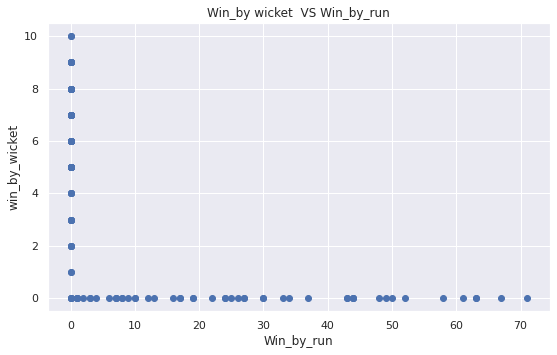

In [238]:
plt.scatter(pslmatches.win_by_runs,pslmatches.win_by_wickets)
plt.xlabel('Win_by_run')
plt.ylabel('win_by_wicket')
plt.title('Win_by wicket  VS Win_by_run')

**Graph of match played in each season**

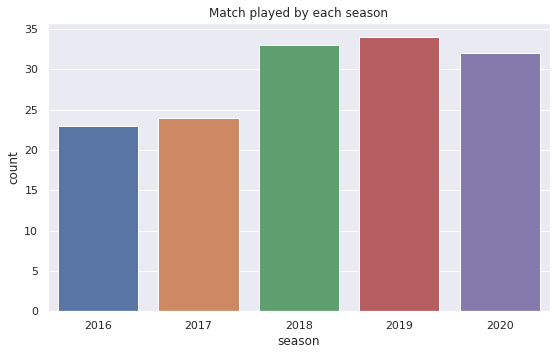

In [239]:
sns.countplot(x='season', data=pslmatches)  
sns.set(rc={'figure.figsize':(12,8.3)})        #each season match count
plt.title('Match played by each season')
plt.show()

**Match played in each venu**

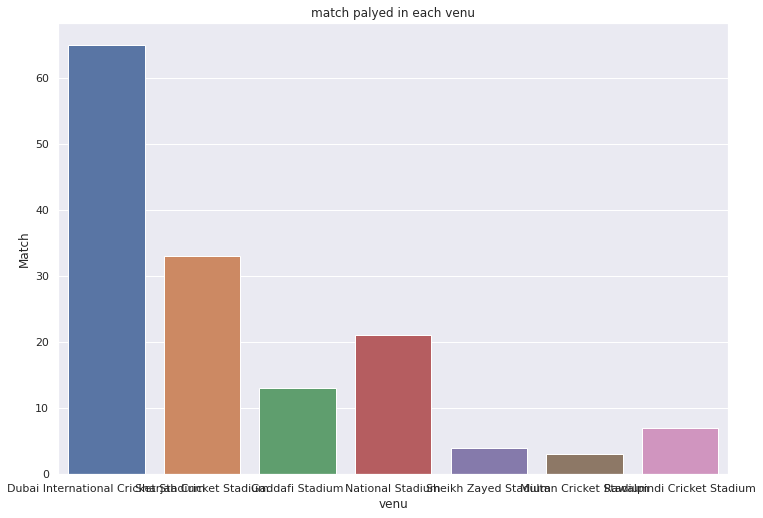

In [240]:
sns.countplot(x='venue' ,data=pslmatches)                   #match played in each venu
plt.title('match palyed in each venu')
plt.xlabel('venu')
plt.ylabel('Match')
sns.set(rc={'figure.figsize':(12,8.3)}) 


**match win by each team**

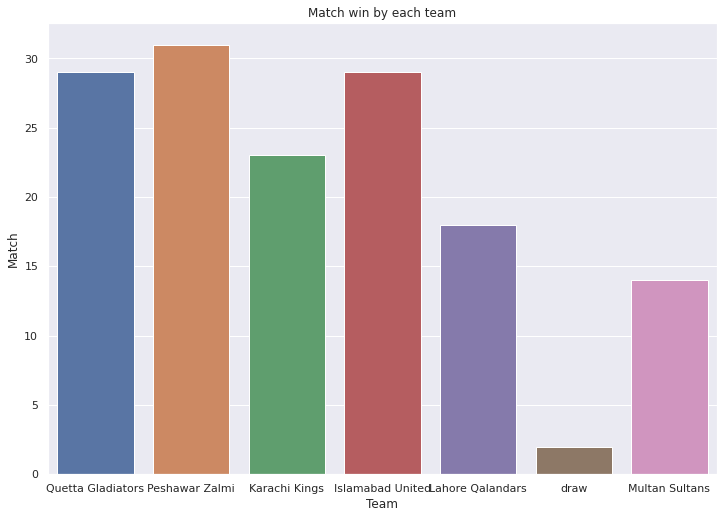

In [241]:
sns.countplot(x='winner', data=pslmatches )
plt.title('Match win by each team')   
plt.xlabel('Team')
plt.ylabel('Match')
sns.set(rc={'figure.figsize':(9,5.3)}) 

**Match played by each tem**

Text(0.5, 1.0, 'Match palyed by each team')

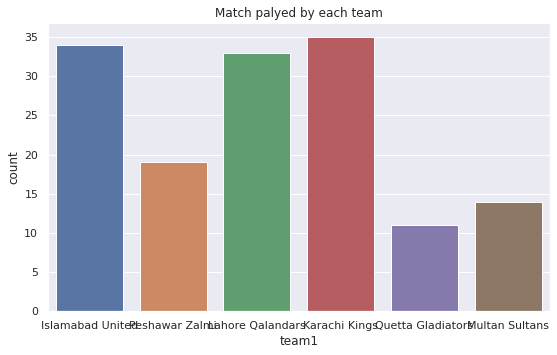

In [242]:
sns.countplot(x='team1' , data=pslmatches)
plt.title('Match palyed by each team')      #confusion


**plot on win_by wickets**

Text(0.5, 1.0, 'Match palyed by each team')

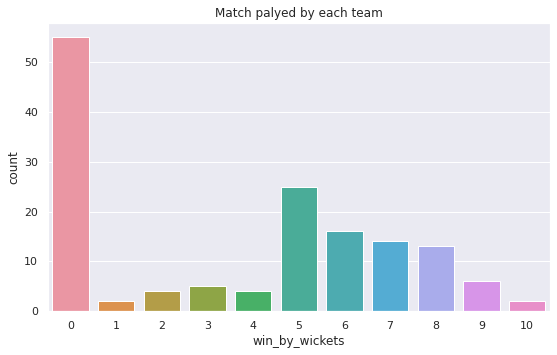

In [243]:
sns.countplot(x='win_by_wickets' , data=pslmatches)
plt.title('Match palyed by each team')

Text(0.5, 1.0, 'Toss win by each team')

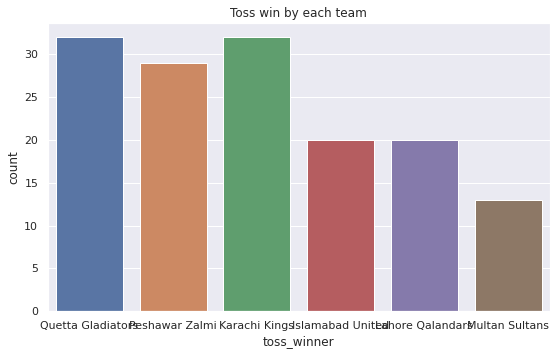

In [244]:
sns.countplot(x='toss_winner',data=pslmatches)
plt.title('Toss win by each team')

**toss decision count**

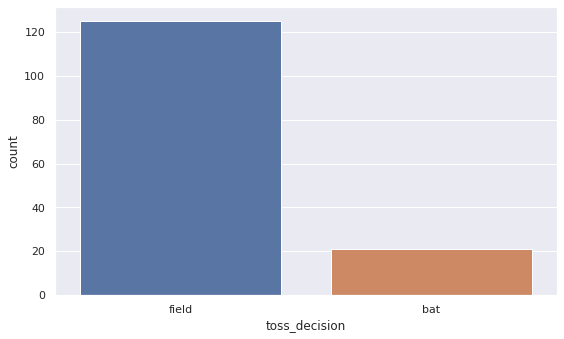

In [245]:
sns.countplot(x='toss_decision' ,data=pslmatches)

**total score type count**

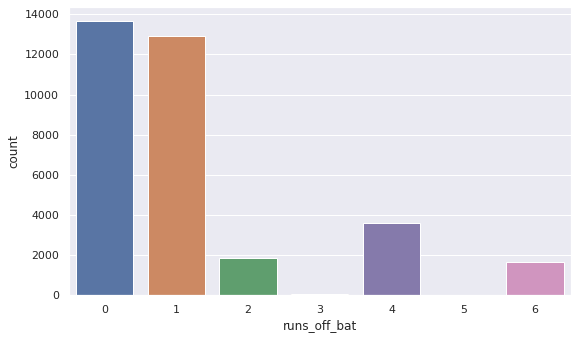

In [246]:
sns.countplot(x='runs_off_bat',data=pslball)

**extra score graph**

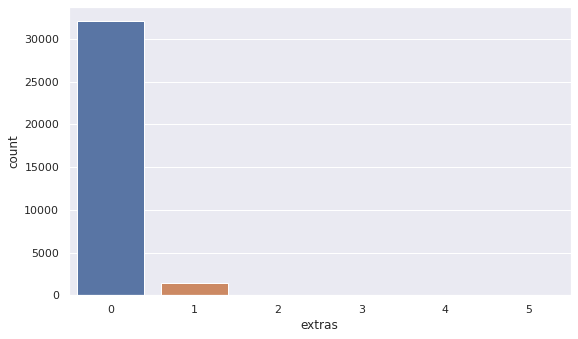

In [247]:
sns.countplot(x='extras',data=pslball)

Text(0.5, 1.0, 'Wickets type in psl')

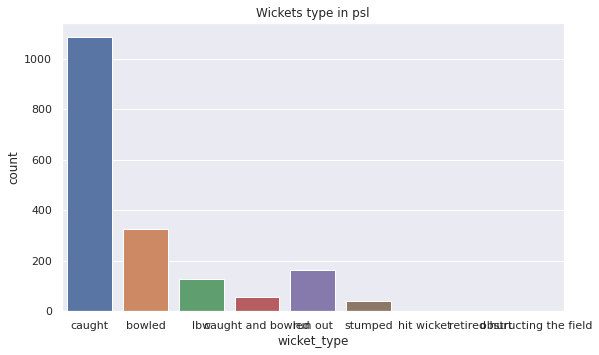

In [248]:
sns.countplot(x='wicket_type',data=pslball)
plt.title('Wickets type in psl')

In [263]:
team1=pslmatches.team1.value_counts()
team1

Karachi Kings        35
Islamabad United     34
Lahore Qalandars     33
Peshawar Zalmi       19
Multan Sultans       14
Quetta Gladiators    11
Name: team1, dtype: int64

In [262]:
team2=pslmatches.team2.value_counts()
team2

Quetta Gladiators    41
Peshawar Zalmi       37
Islamabad United     19
Karachi Kings        17
Multan Sultans       16
Lahore Qalandars     16
Name: team2, dtype: int64